## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


# Adam

In [6]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()
optimizer = keras.optimizers.Adam(lr = 0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=50, 
          batch_size=128, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8736 - acc: 0.3301 - val_loss: 1.7351 - val_acc: 0.3836
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6865 - acc: 0.4047 - val_loss: 1.6459 - val_acc: 0.4162
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5994 - acc: 0.4350 - val_loss: 1.5727 - val_acc: 0.4454
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5401 - acc: 0.4568 - val_loss: 1.5182 - val_acc: 0.4677
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4989 - acc: 0.4702 - val_loss: 1.5086 - val_acc: 0.4642
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4589 - acc: 0.4848 - val_loss: 1.4971 - val_acc: 0.4652
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4245 - acc: 0.4952 - val_loss: 1.4457 - val_ac

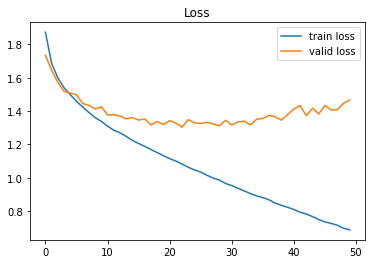

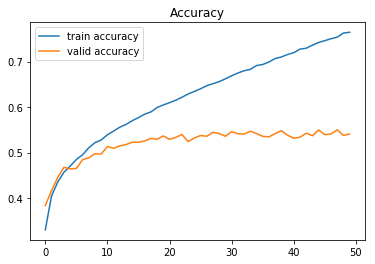

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=50, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.6204 - acc: 0.7945 - val_loss: 1.4063 - val_acc: 0.5517
Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.6034 - acc: 0.8026 - val_loss: 1.4368 - val_acc: 0.5467
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.6015 - acc: 0.8005 - val_loss: 1.4433 - val_acc: 0.5452
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.5953 - acc: 0.8039 - val_loss: 1.4564 - val_acc: 0.5413
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5897 - acc: 0.8028 - val_loss: 1.4710 - val_acc: 0.5465
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.5803 - acc: 0.8079 - val_loss: 1.4764 - val_acc: 0.5454
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5765 - acc: 0.8059 - val_loss: 1.5077 - val_acc

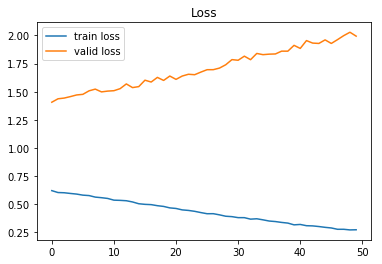

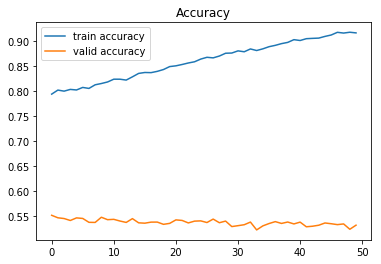

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# SGD

In [15]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()
optimizer = keras.optimizers.SGD(lr = 0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.0355 - acc: 0.3001 - val_loss: 2.0313 - val_acc: 0.3051
Epoch 2/100
50000/50000 [==============================] - 2s 40us/step - loss: 2.0322 - acc: 0.3012 - val_loss: 2.0281 - val_acc: 0.3063
Epoch 3/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.0290 - acc: 0.3018 - val_loss: 2.0248 - val_acc: 0.3079
Epoch 4/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.0258 - acc: 0.3037 - val_loss: 2.0217 - val_acc: 0.3091
Epoch 5/100
50000/50000 [==============================] - 2s 40us/step - loss: 2.0227 - acc: 0.3047 - val_loss: 2.0186 - val_acc: 0.3101
Epoch 6/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.0197 - acc: 0.3053 - val_loss: 2.0155 - val_acc: 0.3113
Epoch 7/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.0167 - acc: 0.3076 - val_loss: 2.0125 - 

50000/50000 [==============================] - 2s 40us/step - loss: 1.9079 - acc: 0.3435 - val_loss: 1.9043 - val_acc: 0.3464
Epoch 60/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.9064 - acc: 0.3442 - val_loss: 1.9028 - val_acc: 0.3467
Epoch 61/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.9049 - acc: 0.3444 - val_loss: 1.9014 - val_acc: 0.3479
Epoch 62/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.9035 - acc: 0.3455 - val_loss: 1.8999 - val_acc: 0.3476
Epoch 63/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.9020 - acc: 0.3460 - val_loss: 1.8984 - val_acc: 0.3494
Epoch 64/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.9006 - acc: 0.3458 - val_loss: 1.8970 - val_acc: 0.3508
Epoch 65/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.8992 - acc: 0.3467 - val_loss: 1.8956 - val_acc: 0.3508
Epoch 66/100
50000/50000 [==============

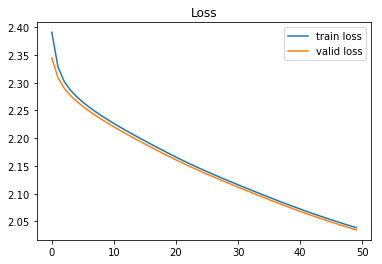

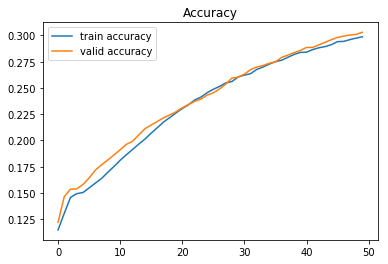

In [17]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

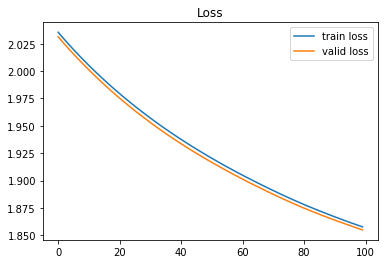

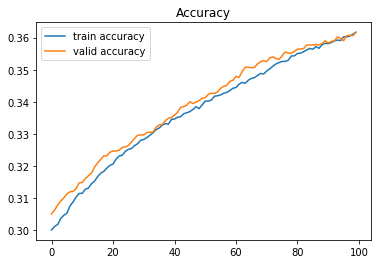

In [19]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()